In [64]:
# Librerías
library(readxl)
library(dplyr)
library(car)
library(explore)
library(psych)
library(corrplot)
library(readr)
library(GGally)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:explore’:

    rescale01




In [32]:
options(scipen = 999)

# Data Regresión

In [42]:
ruta_train <- "Train real state.csv"
ruta_test <- "Test real state.csv"
train <- read_csv(ruta_train)

options(width = 200)
head(train)

New names:
• `` -> `...1`
Rows: 4124 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): HallwayType, HeatingType, AptManageType, TimeToBusStop, TimeToSubway, SubwayStation
dbl (25): ...1, SalePrice, YearBuilt, YrSold, MonthSold, Size.sqf., Floor, N_Parkinglot.Ground., N_Parkinglot.Basement., N_APT, N_manager, N_elevators, N_FacilitiesNearBy.PublicOffice., N_Faciliti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,SalePrice,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,HallwayType,HeatingType,AptManageType,⋯,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.ETC.,N_FacilitiesNearBy.Park.,N_SchoolNearBy.Elementary.,N_SchoolNearBy.Middle.,N_SchoolNearBy.High.,N_SchoolNearBy.University.,N_FacilitiesInApt,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,⋯,1,1,0,3,2,2,2,5,6,9
2,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,⋯,1,2,1,2,1,1,0,3,12,4
3,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,⋯,1,2,1,2,1,1,0,3,12,4
5,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,⋯,1,5,0,4,3,5,5,4,14,17
7,78318,1992,2007,8,644,2,mixed,individual_heating,self_management,⋯,1,1,0,3,3,4,4,3,9,14
8,61946,1993,2007,8,644,10,mixed,individual_heating,management_in_trust,⋯,1,5,0,4,3,5,5,4,14,17


In [43]:
glimpse(train) #SalePrice, YearBuilt, YrSold, MonthSold, Size.sqf., Floor, N_Parkinglot.Ground. N_Parkinglot.Basement., N_APT, N_manager

Rows: 4,124
Columns: 31
$ ...1                               <dbl> 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 27, 29, 30, 31, 33, 35, 38, 39, 40, 41, 43, 44, 46, 47, 48, 50, 51, 53, 59, 60, 61, 6…
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ MonthSold                          <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,

In [53]:
train <- train %>%
    select(-starts_with("..."))

dim(train)
# names(train) <- make.names((names(train)))

train <- train %>% mutate((across(where(is.character), as.factor)))

glimpse(train)

[1] 4124   30

Rows: 4,124
Columns: 30
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ MonthSold                          <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 1…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 91

Yo creo que las variables que pueden influir en el precio del inmueble son los siguientes:
YearBuilt, Size.sqf, Floor, N_Parkinglot.Ground,  N_Parkinglot.Basement, N_elevators, N_FacilitiesNearBy.Mall, N_FacilitiesNearBy.Park,  N_FacilitiesInApt, N_SchoolNearBy.Total

In [54]:
colSums(is.na(train))


SalePrice                          YearBuilt                             YrSold                          MonthSold                          Size.sqf. 
                                 0                                  0                                  0                                  0                                  0 
                             Floor                        HallwayType                        HeatingType                      AptManageType               N_Parkinglot.Ground. 
                                 0                                  0                                  0                                  0                                  0 
            N_Parkinglot.Basement.                      TimeToBusStop                       TimeToSubway                              N_APT                          N_manager 
                                 0                                  0                                  0                                  0                                  0 
                       N_elevators                      SubwayStation   N_FacilitiesNearBy.PublicOffice.       N_FacilitiesNearBy.Hospital. N_FacilitiesNearBy.Dpartmentstore. 
                                 0                                  0                                  0                                  0                                  0 
          N_FacilitiesNearBy.Mall.            N_FacilitiesNearBy.ETC.           N_FacilitiesNearBy.Park.         N_SchoolNearBy.Elementary.             N_SchoolNearBy.Middle. 
                                 0                                  0                                  0                                  0                                  0 
              N_SchoolNearBy.High.         N_SchoolNearBy.University.                  N_FacilitiesInApt          N_FacilitiesNearBy.Total.              N_SchoolNearBy.Total. 
                                 0                                  0                                  0                                  0                                  0

## Cálculo e interpretación de medidas de tendencia central 

In [55]:
describe(train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SalePrice,1,4124,221687.6178468,106353.1865756,207964,215916.4300000,104963.6322,32743,585840,553097,0.47980600,-0.3084196,1656.117622844
YearBuilt,2,4124,2002.9747818,8.8461584,2006,2003.7654545,4.4478,1978,2015,37,-0.80913783,-0.3598156,0.137751197
YrSold,3,4124,2012.7019884,2.9034401,2013,2012.7593939,4.4478,2007,2017,10,-0.15007251,-1.1798272,0.045211982
MonthSold,4,4124,6.1627061,3.3824756,6,6.1230303,4.4478,1,12,11,0.10820934,-1.1395532,0.052671458
Size.sqf.,5,4124,955.9090689,376.9054483,910,922.8909091,394.3716,135,2337,2202,0.87115261,0.8370424,5.869121322
Floor,6,4124,12.0647430,7.6164692,11,11.4363636,7.4130,1,43,42,0.79846194,0.5954025,0.118602641
HallwayType*,7,4124,2.5016974,0.6793778,3,2.6269697,0.0000,1,3,2,-1.01761481,-0.2151102,0.010579181
HeatingType*,8,4124,1.9485936,0.2208520,2,2.0000000,0.0000,1,2,1,-4.06140583,14.4985331,0.003439078
AptManageType*,9,4124,1.0601358,0.2377671,1,1.0000000,0.0000,1,2,1,3.69906166,11.6858910,0.003702477


### Explorando la variable objetivo SalesPrice

[1] 556637 527433 513274 570796 530973 566371 530973 526548 517699 517699 530973 529203 526548 522123 564601 529203 566371 515929 585840 515044 526548 522123 557522 570796 511504

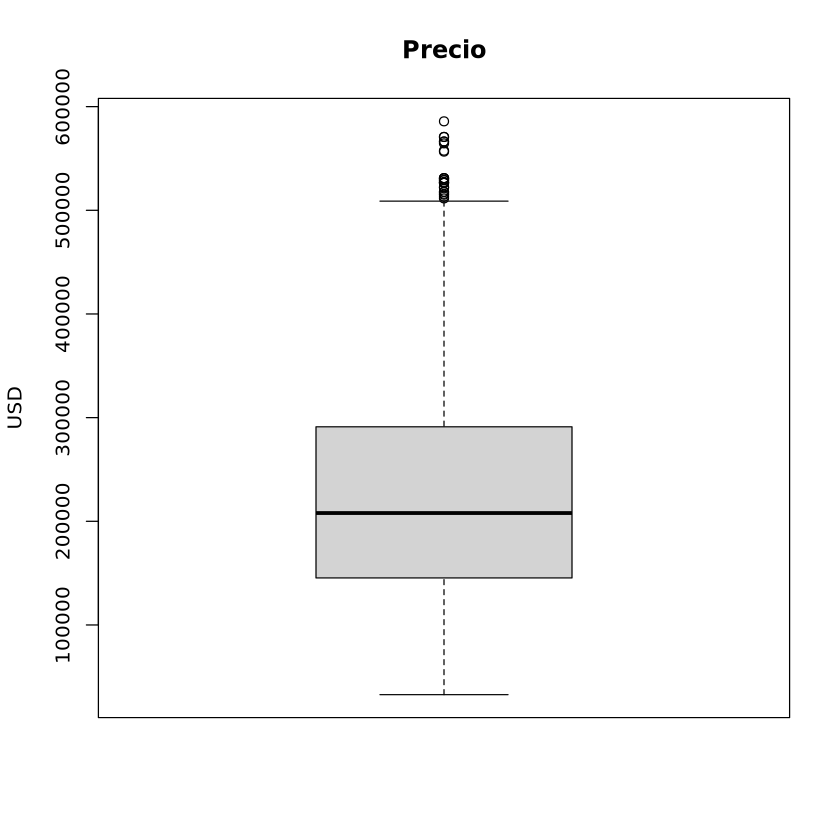

In [154]:
boxplot(train$SalePrice, main = "Precio", ylab = "USD")$out

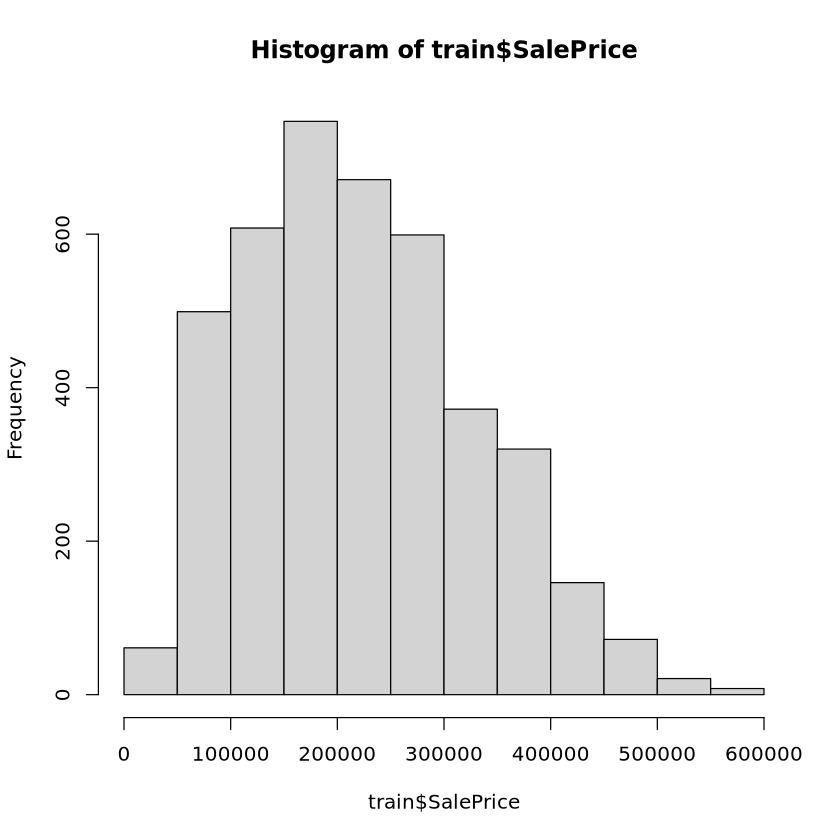

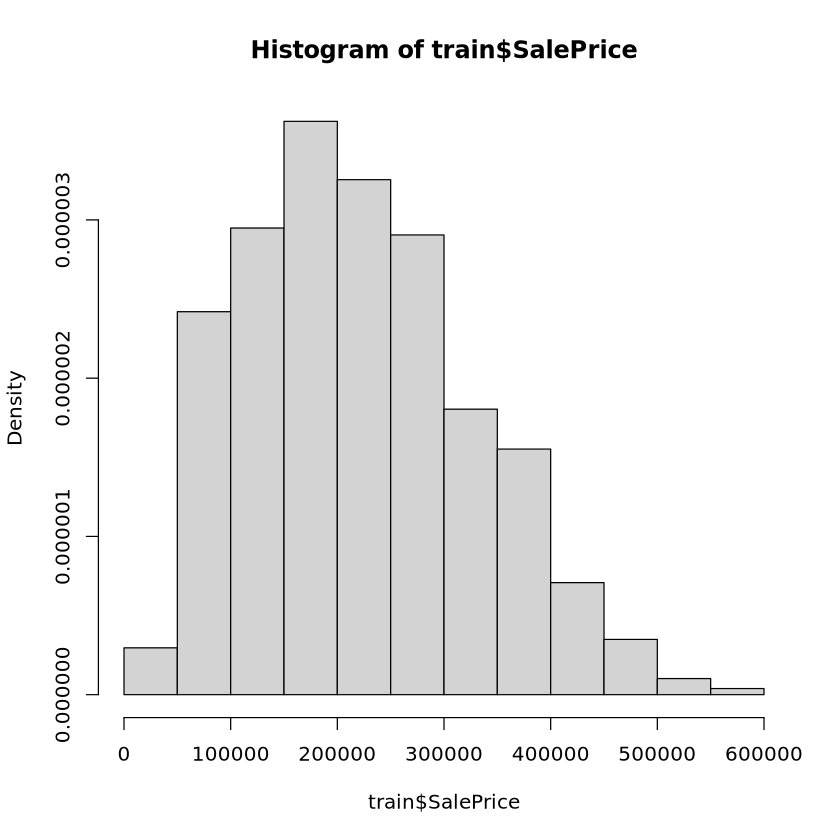

In [60]:
hist(train$SalePrice) #Histograma de frecuencias
hist(train$SalePrice, freq = FALSE) #Densidades de probabilidad

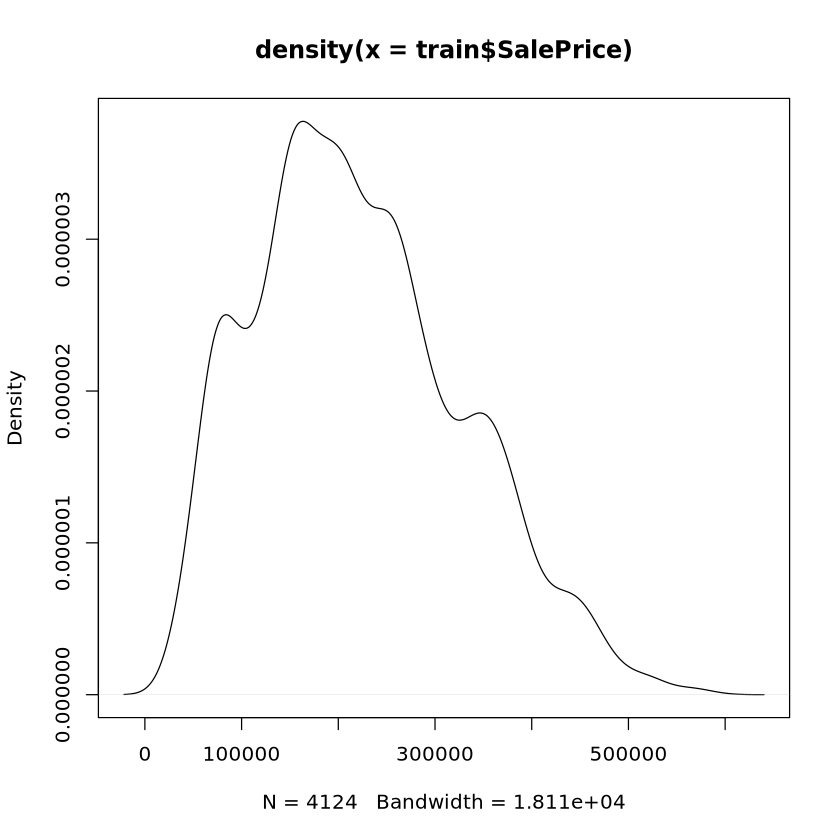

In [61]:
plot(density(train$SalePrice))

In [155]:
kurtosi(train$SalePrice)

[1] -0.3084196

[1] 3901 3030

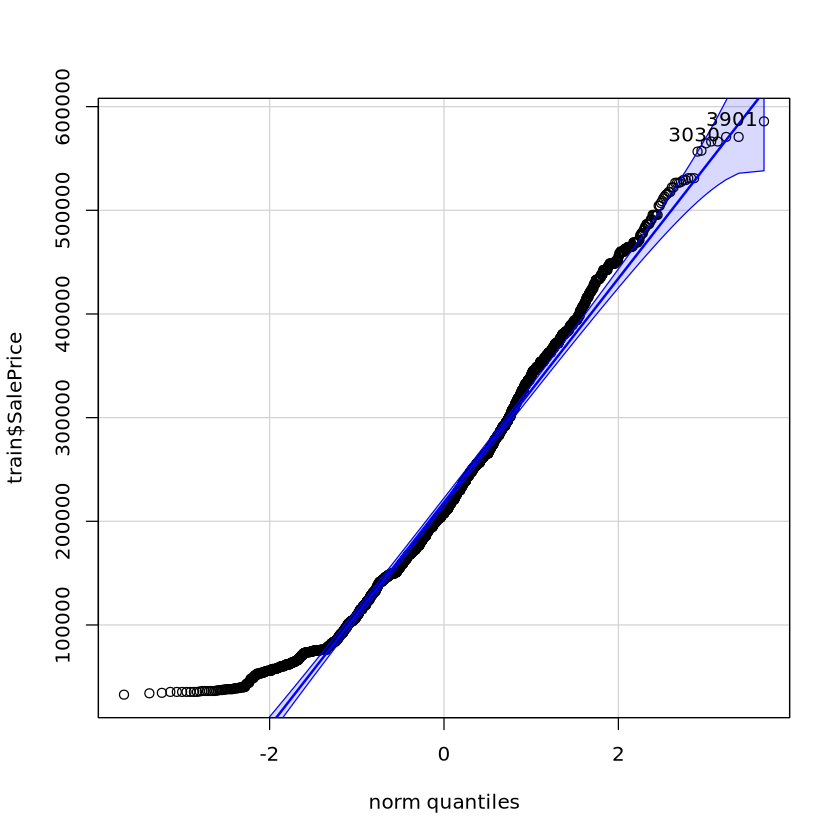

In [156]:
qqPlot(train$SalePrice)

## Cálculo e interpretación de medidas de dispersión 

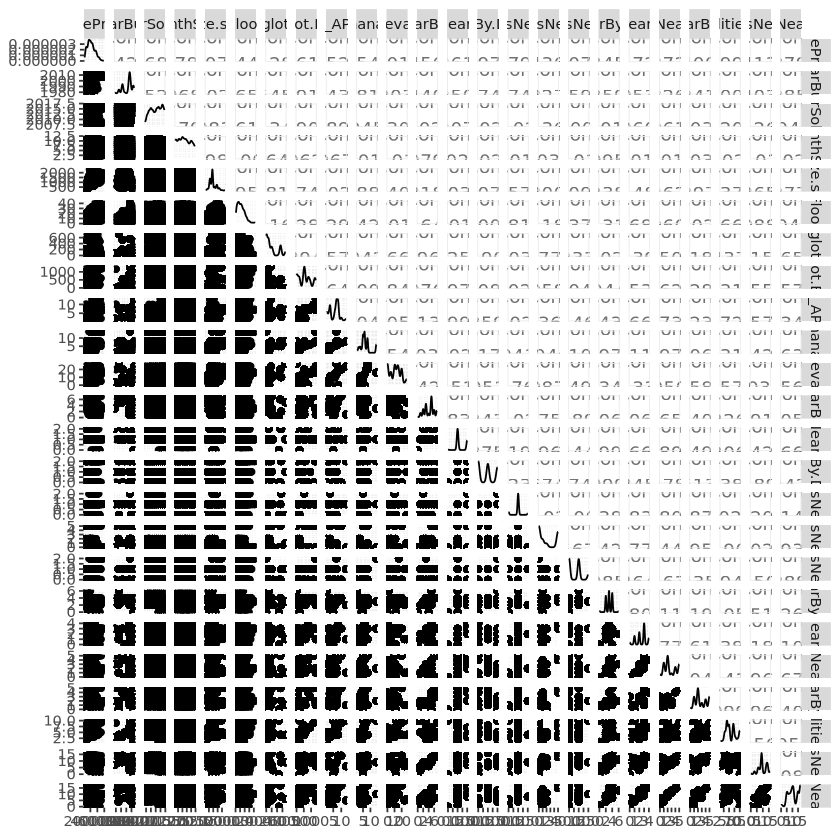

In [68]:
x11(width = 20, height = 20)
num_train <- train %>% select(where(is.numeric))
ggpairs(num_train)

In [69]:
png("pairplot.png", width = 5000, height = 5000, res = 300)
ggpairs(num_train)
dev.off()

png 
  2

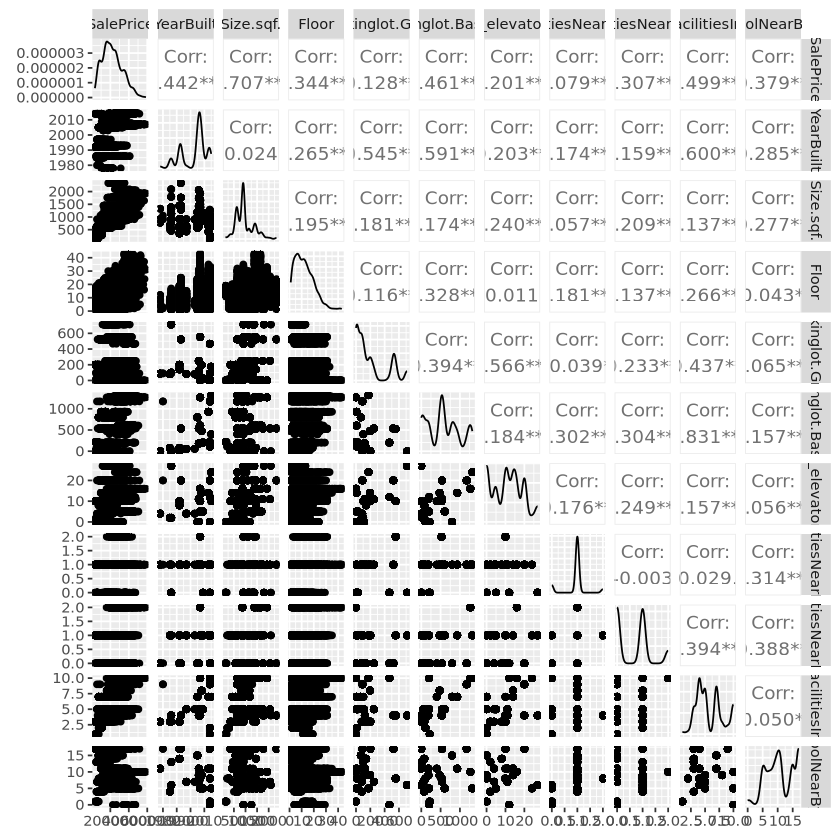

In [76]:
subset_train <- train %>%
  select(SalePrice,YearBuilt, Size.sqf., Floor, N_Parkinglot.Ground., 
         N_Parkinglot.Basement., N_elevators, N_FacilitiesNearBy.Mall., 
         N_FacilitiesNearBy.Park., N_FacilitiesInApt, N_SchoolNearBy.Total.)

# Haces el pairplot solo con esas columnas
ggpairs(subset_train)

,SalePrice,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,N_Parkinglot.Ground.,N_Parkinglot.Basement.,N_APT,N_manager,⋯,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.ETC.,N_FacilitiesNearBy.Park.,N_SchoolNearBy.Elementary.,N_SchoolNearBy.Middle.,N_SchoolNearBy.High.,N_SchoolNearBy.University.,N_FacilitiesInApt,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
SalePrice,1.00000000,0.44207856,0.367529133,0.078478026,0.70650677,0.343557400,-0.12833523,0.46112702,0.15248000,0.35354992,⋯,0.079133702,-0.43593356,0.306711478,-0.34543576,-0.17234662,-0.37167983,-0.40047763,0.49882673,-0.41314942,-0.37926551
YearBuilt,0.44207856,1.00000000,0.251651839,-0.068373281,0.02371486,0.265282637,-0.54544184,0.59127953,0.14261596,0.08122927,⋯,0.173967239,-0.32676199,0.159109216,-0.35935236,-0.05344836,-0.32595563,-0.24085471,0.59996511,-0.40277145,-0.28482708
YrSold,0.36752913,0.25165184,1.000000000,-0.178632157,-0.08327168,0.060603418,-0.13417034,0.19017675,0.18863084,0.04495384,⋯,-0.022650161,-0.13649389,0.007392229,0.01608243,-0.06041203,-0.06111573,-0.03174033,0.21988679,-0.12618778,-0.04273107
MonthSold,0.07847803,-0.06837328,-0.178632157,1.000000000,0.09843801,-0.008580796,0.06432867,-0.06231771,-0.06650813,0.01595318,⋯,0.014219012,0.02978826,-0.010423732,-0.09503893,0.01464524,0.01042893,-0.03736994,-0.02765067,-0.01372078,-0.02592512
Size.sqf.,0.70650677,0.02371486,-0.083271678,0.098438005,1.00000000,0.194928574,0.18052079,0.17433111,0.02388098,0.28794652,⋯,0.057127424,-0.29991175,0.208969042,-0.23789900,-0.14848210,-0.26151328,-0.29673675,0.13697120,-0.26544366,-0.27713798
Floor,0.34355740,0.26528264,0.060603418,-0.008580796,0.19492857,1.000000000,-0.11627128,0.32819074,0.12889299,0.24161088,⋯,0.181115945,-0.11785868,0.136674972,-0.13102684,0.06784583,-0.05954433,-0.02781587,0.26596916,-0.08789063,-0.04250176
N_Parkinglot.Ground.,-0.12833523,-0.54544184,-0.134170335,0.064328671,0.18052079,-0.116271276,1.00000000,-0.39376752,0.15735599,0.04163541,⋯,-0.039116863,0.17738133,-0.233167092,0.02393350,-0.13890939,0.14986449,0.11810211,-0.43673652,0.11485341,0.06474056
N_Parkinglot.Basement.,0.46112702,0.59127953,0.190176748,-0.062317708,0.17433111,0.328190744,-0.39376752,1.00000000,0.66406940,0.69968064,⋯,0.302053216,-0.05848149,0.304324993,0.04432410,0.35331130,0.06210967,0.12795295,0.83141589,0.05503208,0.15695786
N_APT,0.15248000,0.14261596,0.188630845,-0.066508127,0.02388098,0.128892987,0.15735599,0.66406940,1.00000000,0.60399142,⋯,0.024128483,0.33569330,-0.145653668,0.24271985,0.46625463,0.37332713,0.42250088,0.57230120,0.25679896,0.43393561
N_manager,0.35354992,0.08122927,0.044953844,0.015953181,0.28794652,0.241610880,0.04163541,0.69968064,0.60399142,1.00000000,⋯,0.041176149,-0.04575532,0.509502531,0.09676436,0.31075870,0.09718279,0.10571145,0.63054791,0.14180155,0.16309282


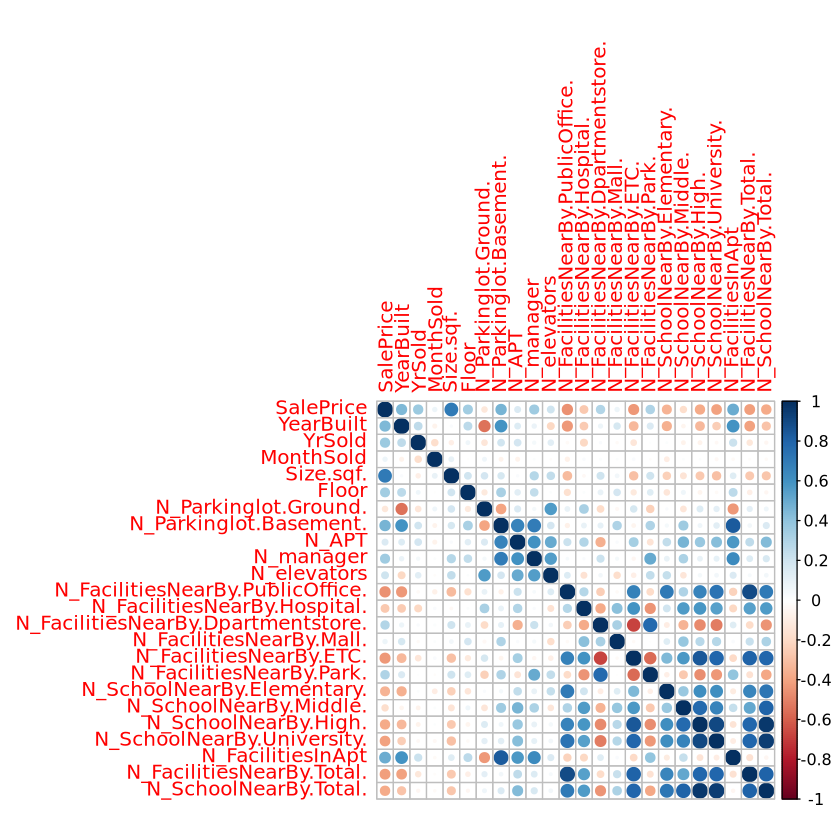

In [63]:
num_train <- train %>% select(where(is.numeric))
cor(num_train)
cor_train <- cor(num_train)
corrplot(cor_train)

In [90]:
colnames(train)

[1] "SalePrice"                          "YearBuilt"                          "YrSold"                             "MonthSold"                          "Size.sqf."                         
 [6] "Floor"                              "HallwayType"                        "HeatingType"                        "AptManageType"                      "N_Parkinglot.Ground."              
[11] "N_Parkinglot.Basement."             "TimeToBusStop"                      "TimeToSubway"                       "N_APT"                              "N_manager"                         
[16] "N_elevators"                        "SubwayStation"                      "N_FacilitiesNearBy.PublicOffice."   "N_FacilitiesNearBy.Hospital."       "N_FacilitiesNearBy.Dpartmentstore."
[21] "N_FacilitiesNearBy.Mall."           "N_FacilitiesNearBy.ETC."            "N_FacilitiesNearBy.Park."           "N_SchoolNearBy.Elementary."         "N_SchoolNearBy.Middle."            
[26] "N_SchoolNearBy.High."               "N_SchoolNearBy.University."         "N_FacilitiesInApt"                  "N_FacilitiesNearBy.Total."          "N_SchoolNearBy.Total."

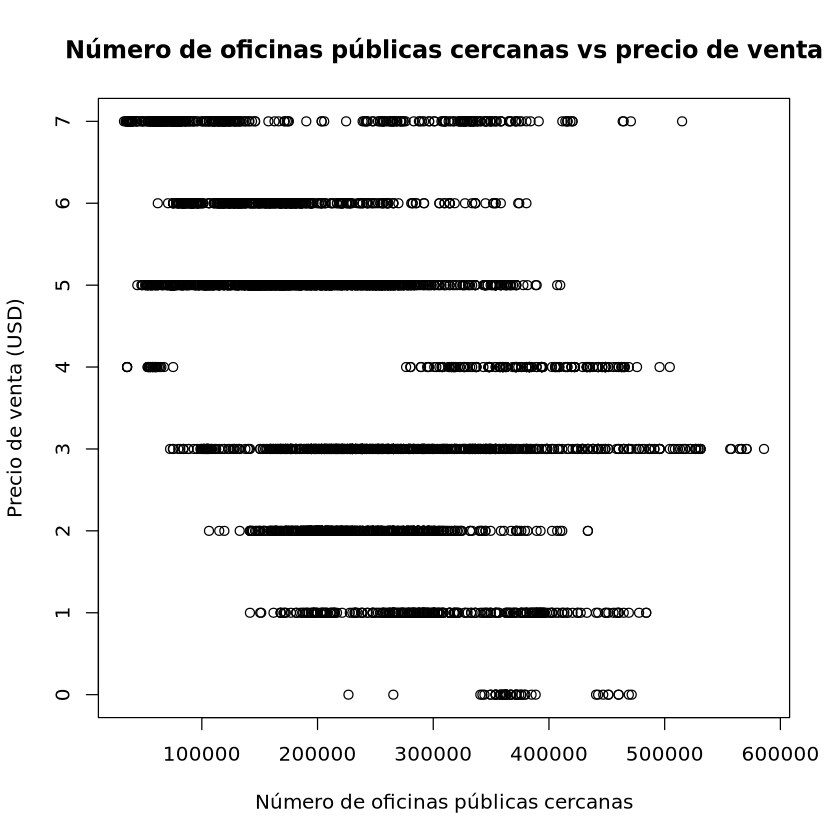

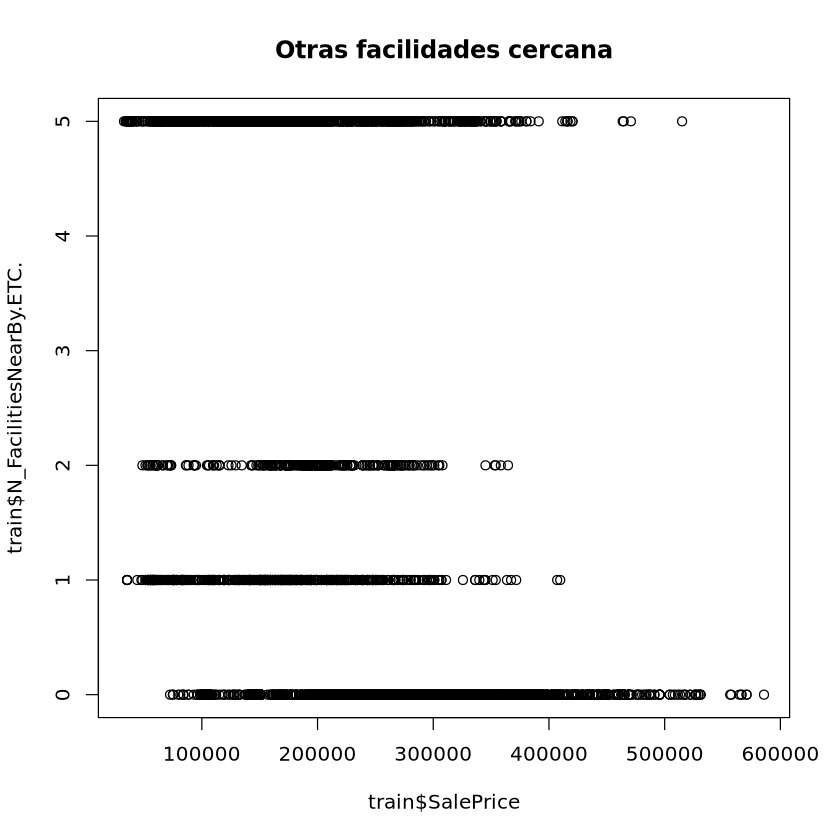

In [160]:
plot(train$SalePrice, train$N_FacilitiesNearBy.PublicOffice., main="Número de oficinas públicas cercanas vs precio de venta", xlab="Número de oficinas públicas cercanas", ylab="Precio de venta (USD)")
plot(train$SalePrice, train$N_FacilitiesNearBy.ETC., main="Otras facilidades cercana")

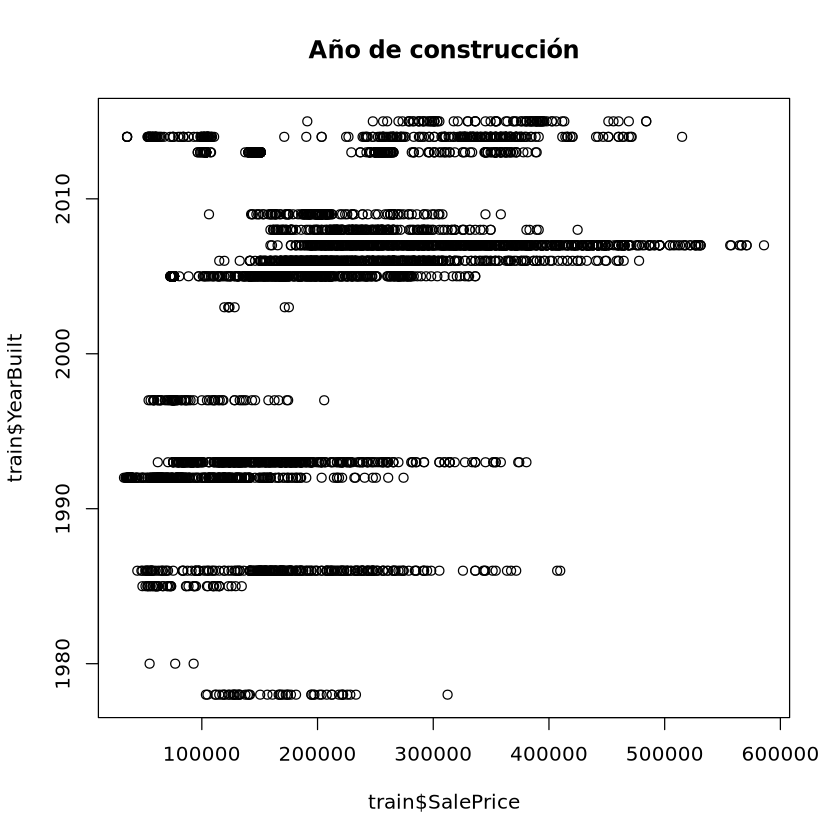

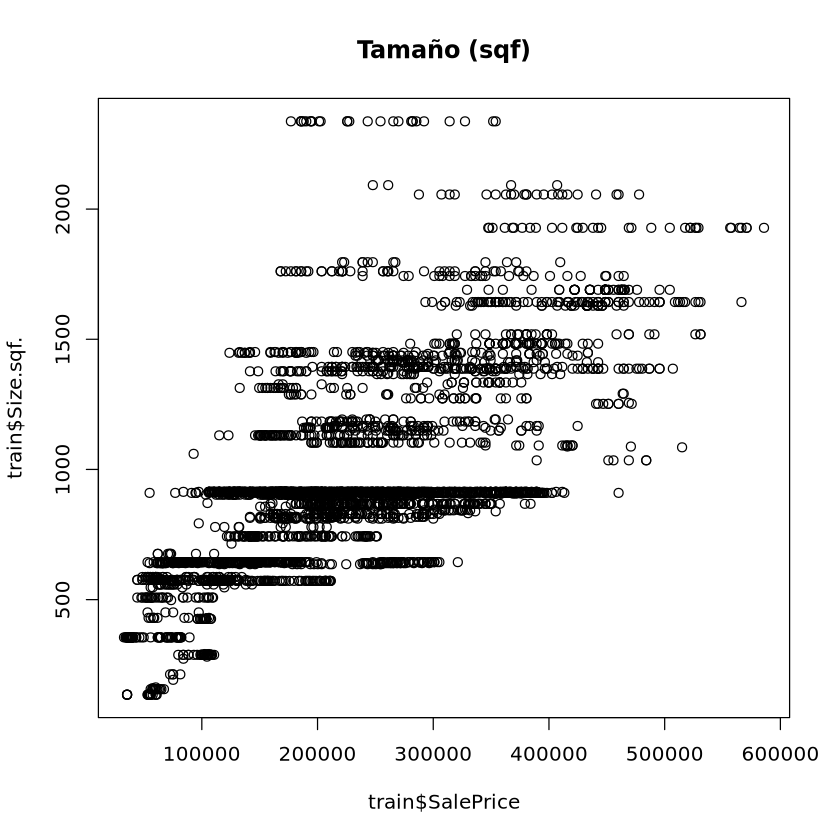

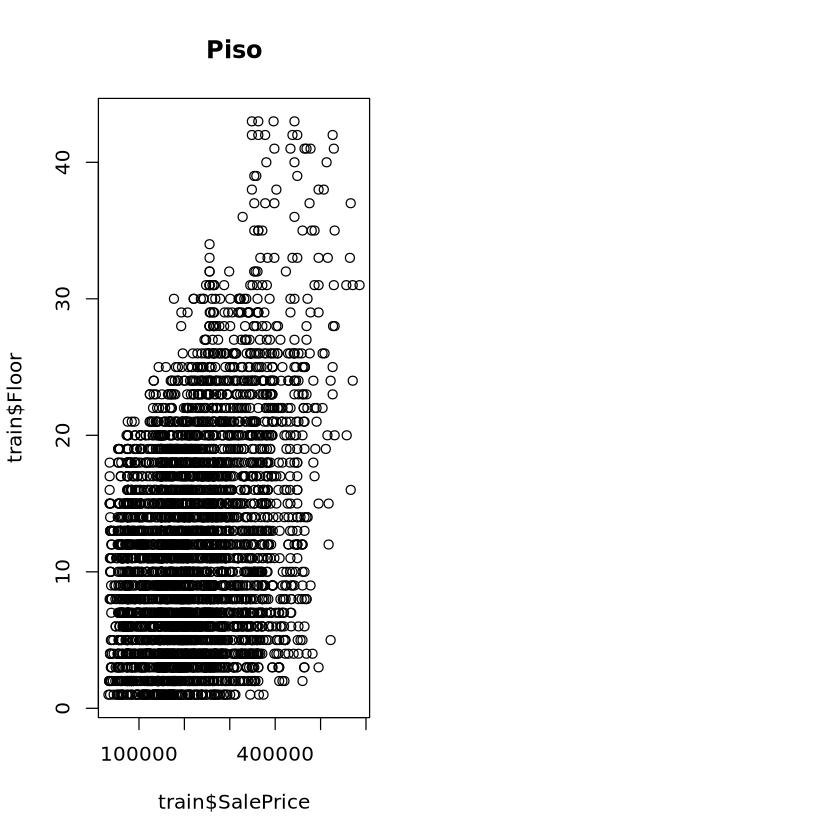

In [105]:
#x11(width = 12, height = 8)
#par(mfrow = c(2, 2))
plot(train$SalePrice, train$YearBuilt, main="Año de construcción")
plot(train$SalePrice, train$Size.sqf., main="Tamaño (sqf)")
# YearBuilt, Size.sqf, Floor, N_Parkinglot.Ground,  N_Parkinglot.Basement, N_elevators, N_FacilitiesNearBy.Mall, N_FacilitiesNearBy.Park,  N_FacilitiesInApt, N_SchoolNearBy.Total

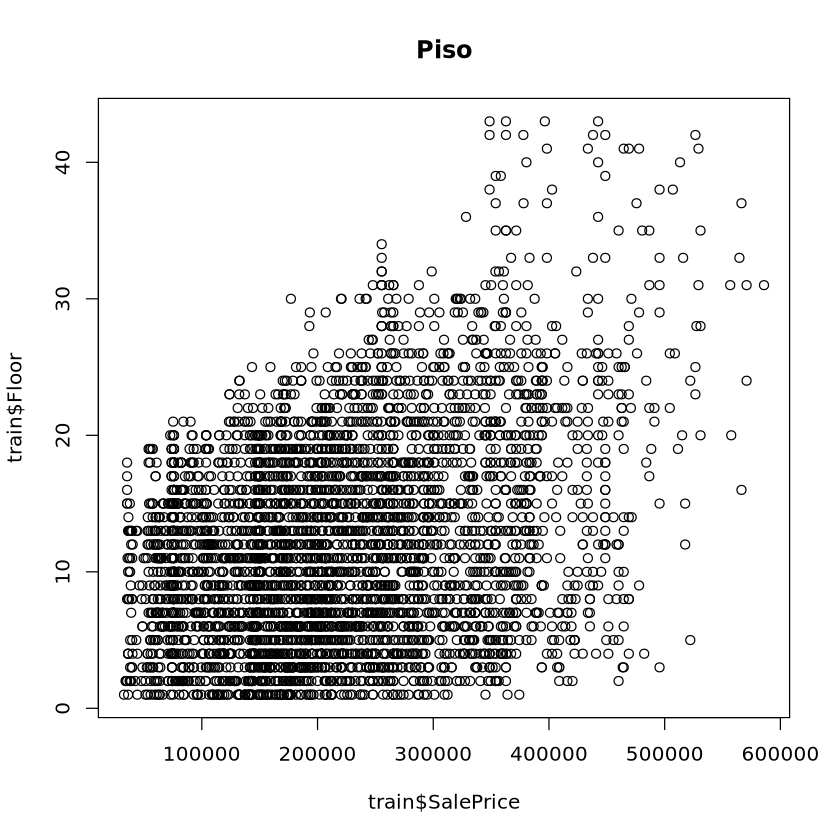

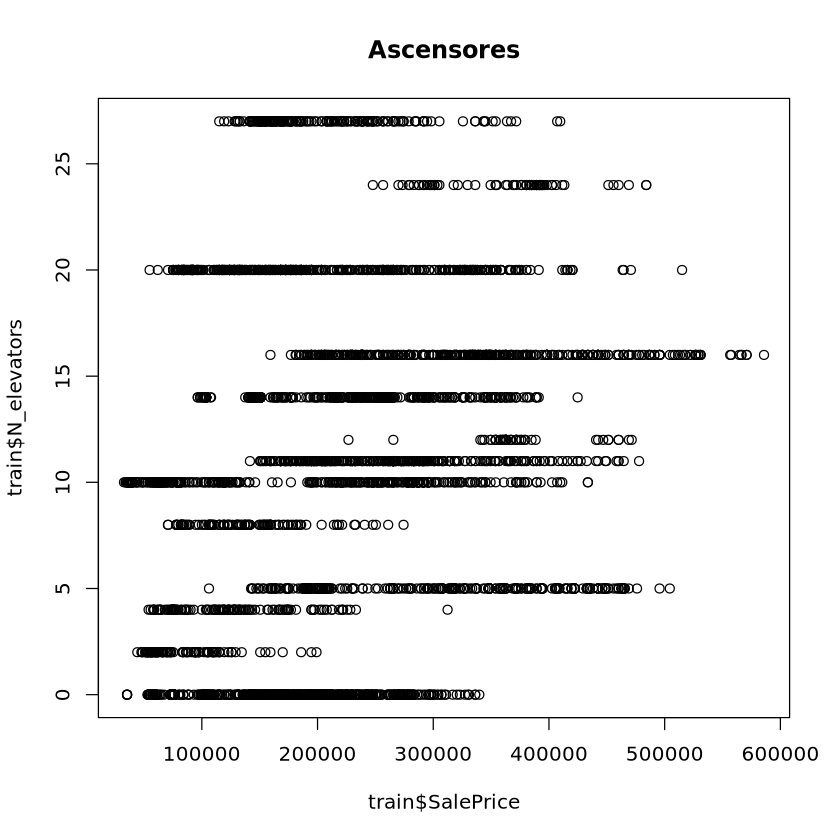

In [100]:
plot(train$SalePrice, train$Floor, main="Piso")
plot(train$SalePrice, train$N_elevators, main="Ascensores")

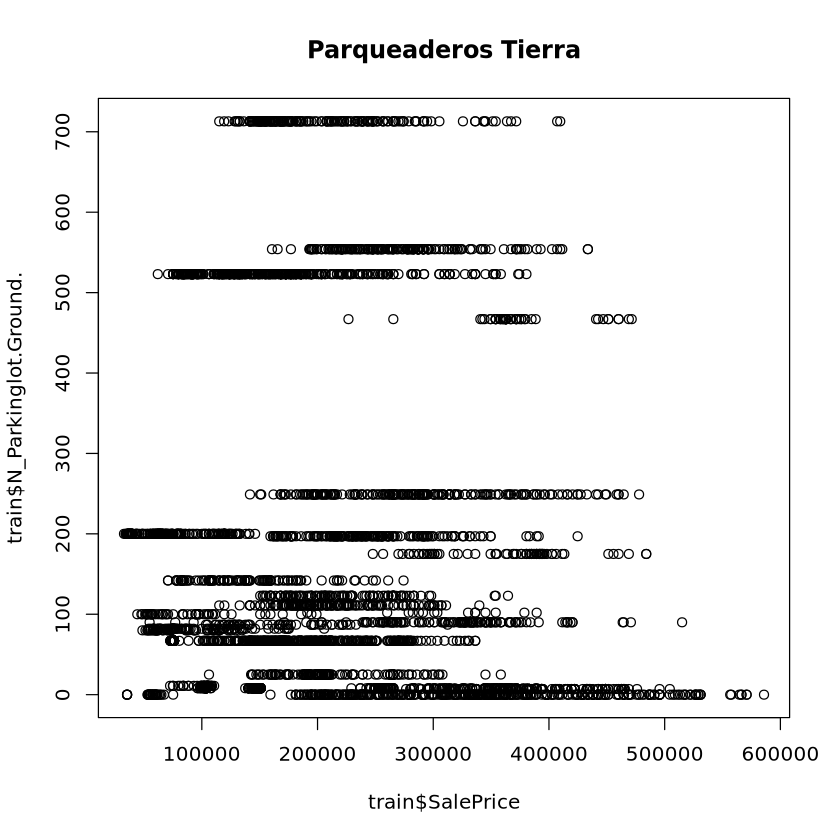

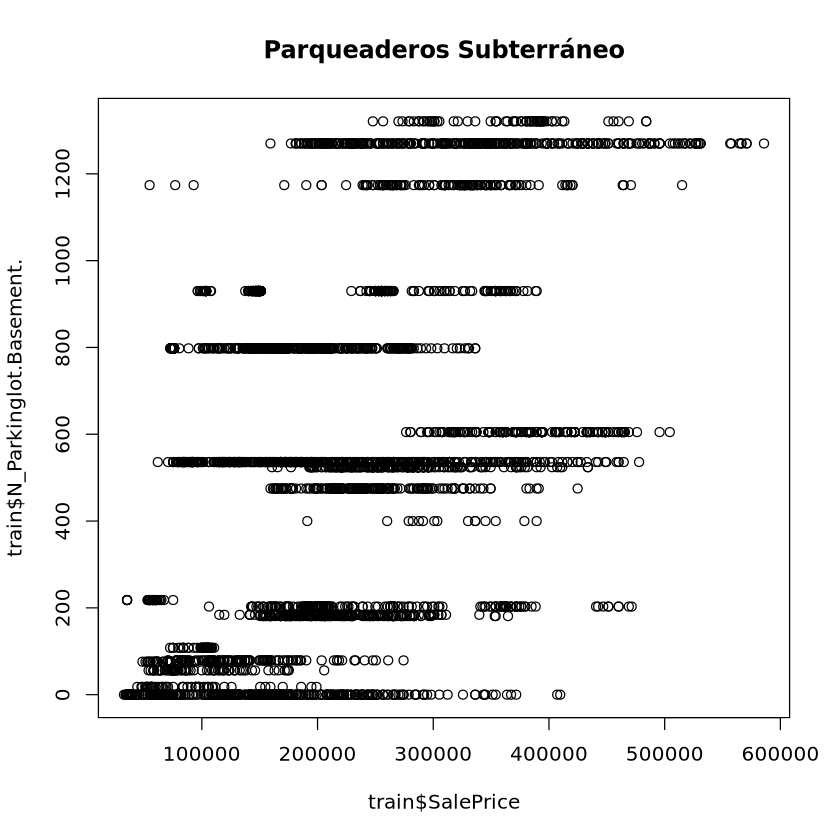

In [101]:
plot(train$SalePrice, train$N_Parkinglot.Ground., main="Parqueaderos Tierra")
plot(train$SalePrice, train$N_Parkinglot.Basement., main="Parqueaderos Subterráneo")

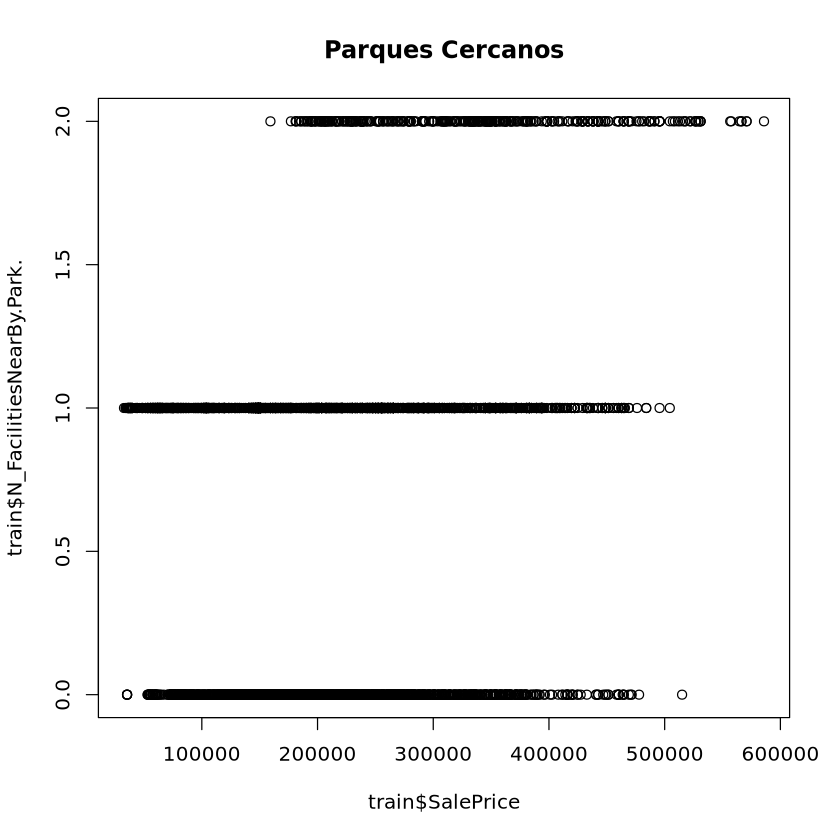

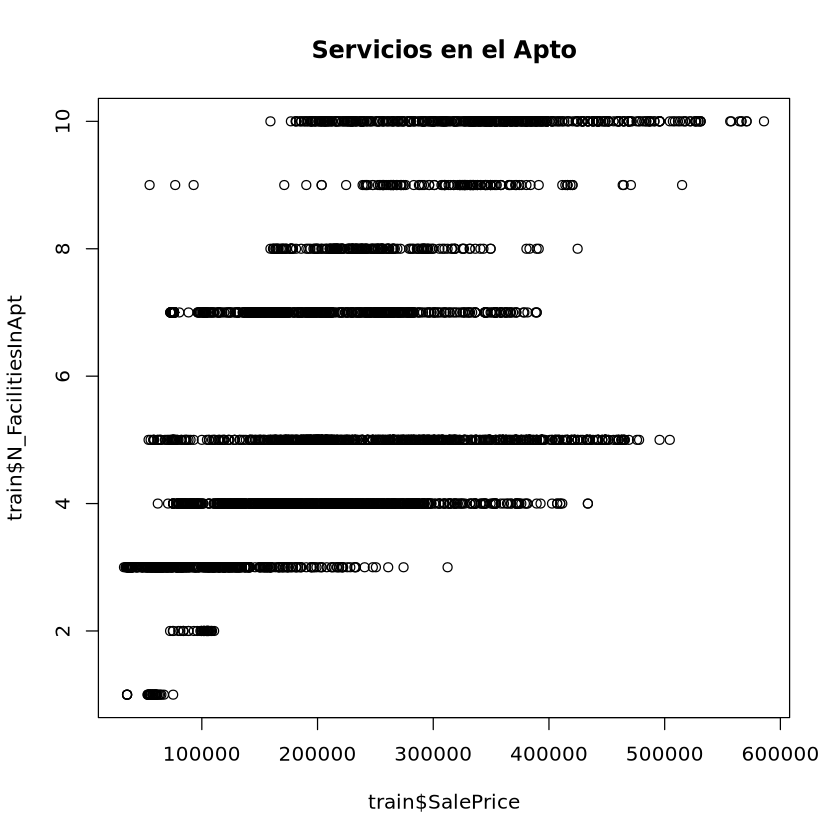

In [103]:
plot(train$SalePrice, train$N_FacilitiesNearBy.Park., main="Parques Cercanos")
plot(train$SalePrice, train$N_FacilitiesInApt, main="Servicios en el Apto")

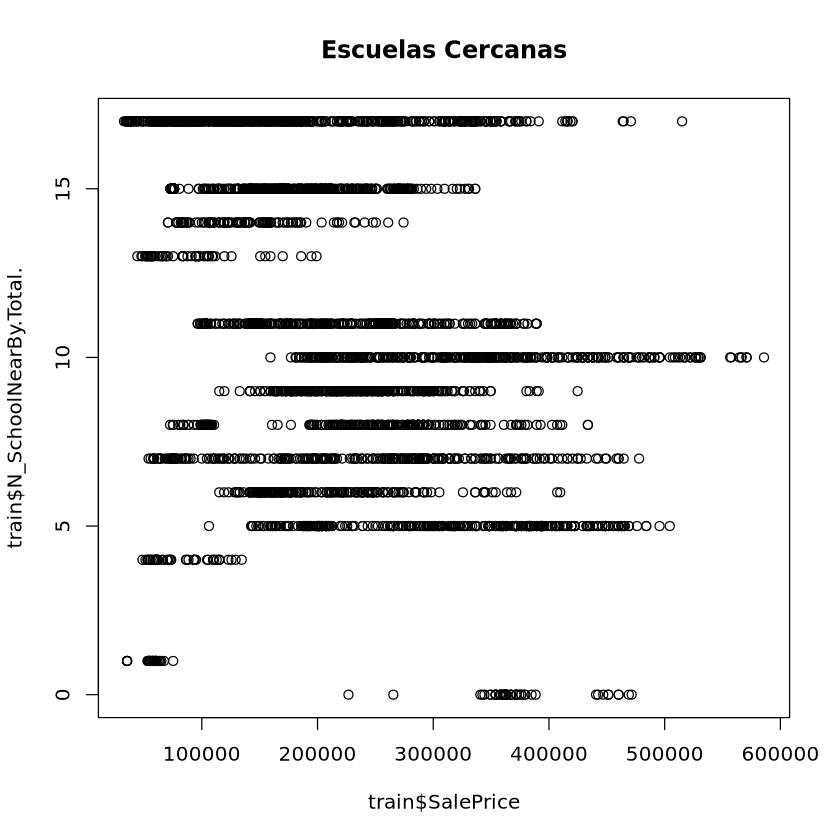

In [159]:
plot(train$SalePrice, train$N_SchoolNearBy.Total., main="Escuelas Cercanas")

In [88]:
# # Diseña la disposición: 2 filas, 3 columnas
# layout(matrix(c(1,2,3,4,5,6,7,8,9), nrow=3, ncol=3, byrow=TRUE))

# # Ahora dibuja los gráficos en el orden que quieras
# plot(train$SalePrice, train$YearBuilt, main="Año de construcción")
# plot(train$SalePrice, train$Size.sqf, main="Tamaño (sqf)")
# plot(train$SalePrice, train$Floor, main="Piso")
# plot(train$SalePrice, train$N_elevators, main="Ascensores")
# plot(train$SalePrice, train$N_Parkinglot.Ground, main="Parqueaderos Tierra")
# plot(train$SalePrice, train$N_Parkinglot.Basement, main="Parqueaderos Subterráneo")
# plot(train$SalePrice, train$N_FacilitiesNearBy.Park, main="Parques Cercanos")
# plot(train$SalePrice, train$N_FacilitiesInAptt, main="Servicios en el Apto")
# plot(train$SalePrice, train$N_SchoolNearBy.Total, main="Servicios en el Apto")


## Construcción e interpretación de diagramas de caja

YearBuilt, Size.sqf, Floor, N_Parkinglot.Ground,  N_Parkinglot.Basement, N_elevators, N_FacilitiesNearBy.Mall, N_FacilitiesNearBy.Park,  N_FacilitiesInApt, N_SchoolNearBy.Total

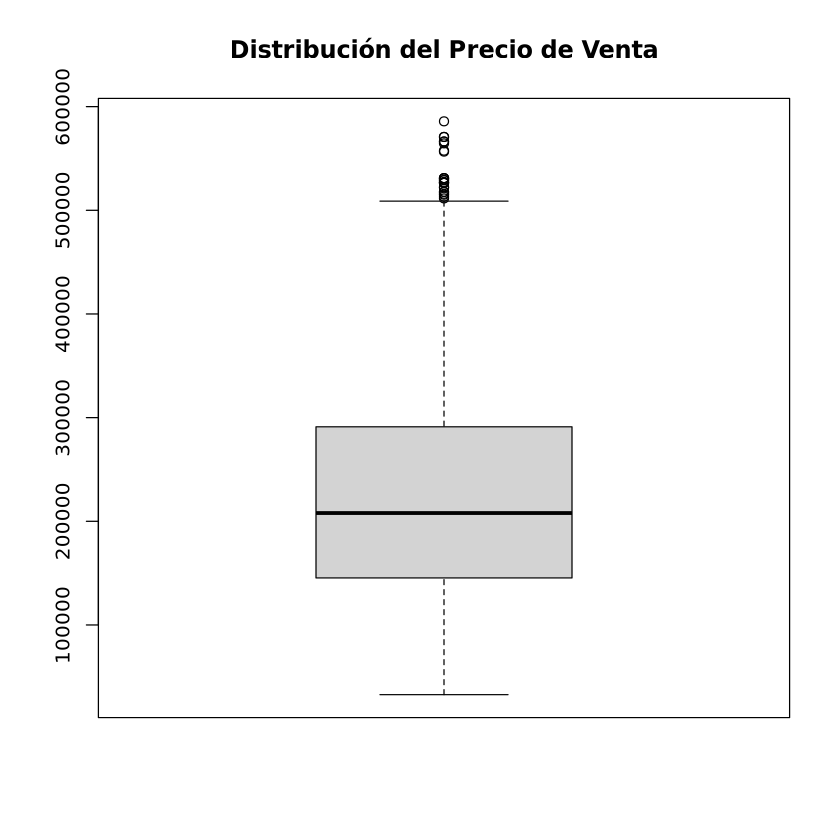

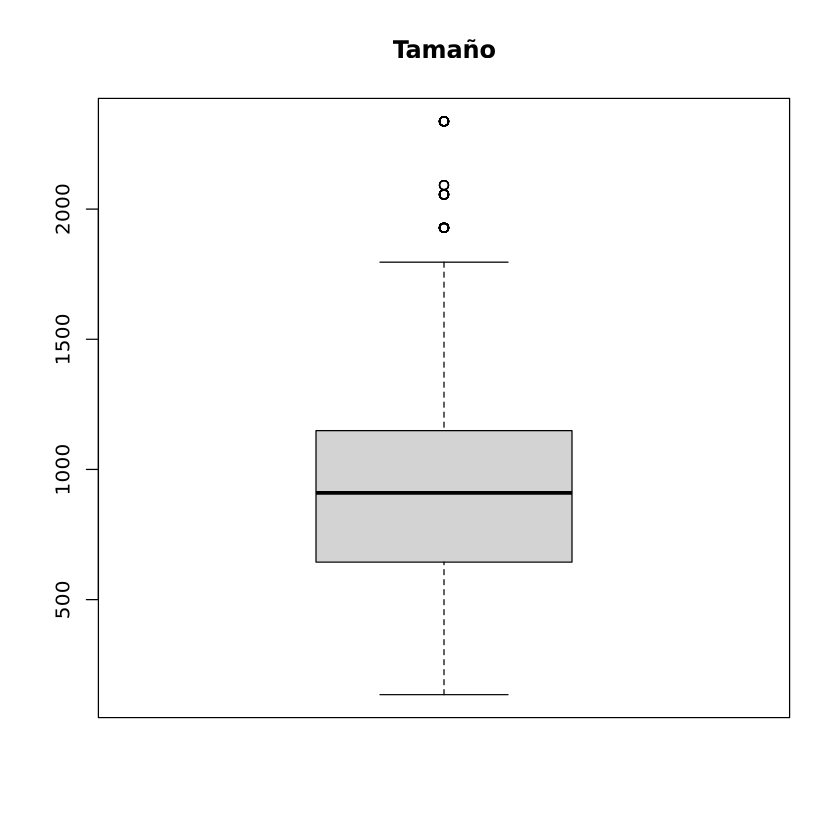

In [119]:
boxplot(train$SalePrice, main = "Distribución del Precio de Venta")
boxplot(train$Size.sqf., main = "Tamaño")

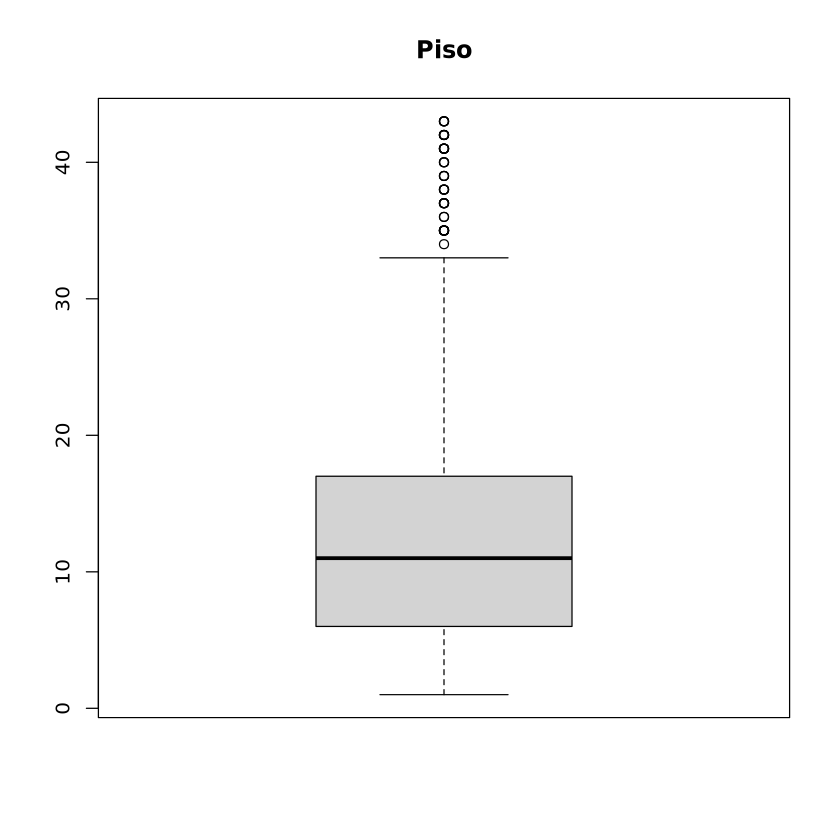

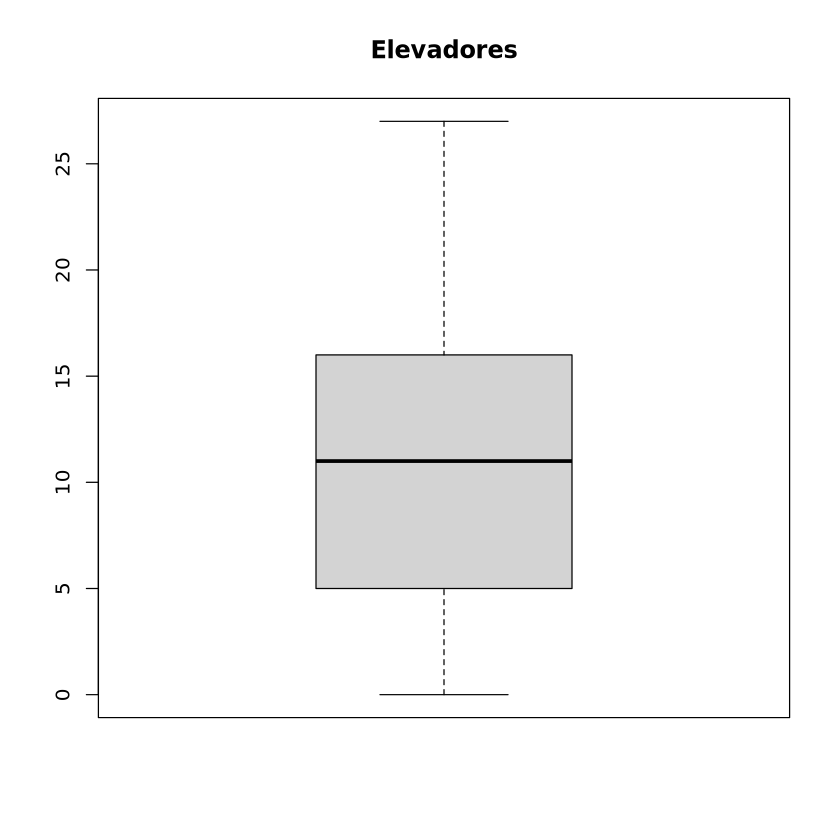

In [121]:
boxplot(train$Floor, main = "Piso")
boxplot(train$N_elevators, main = "Elevadores")

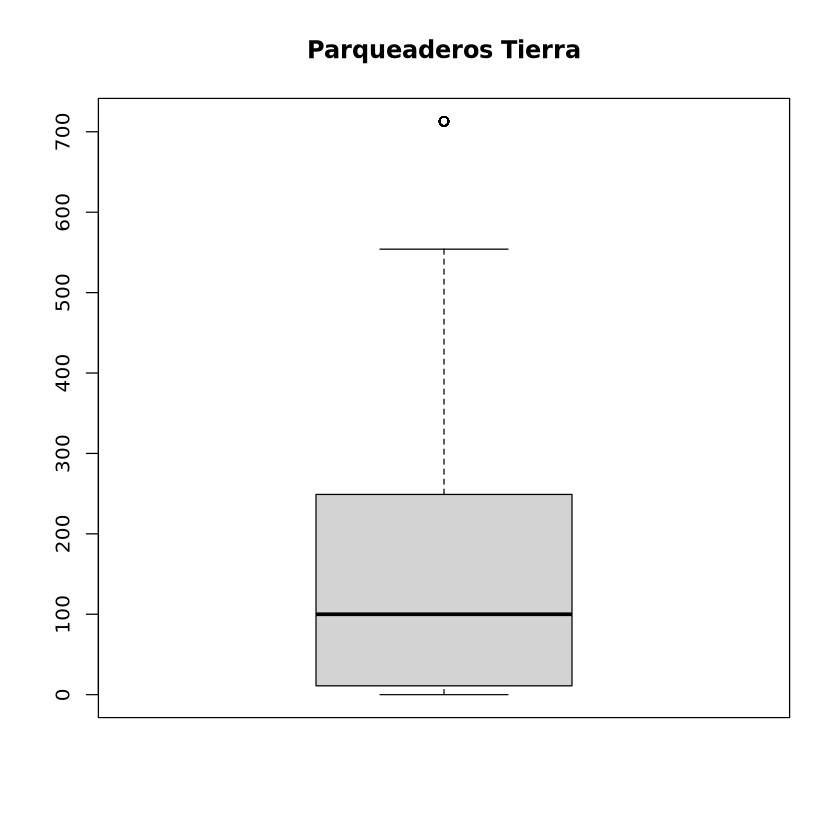

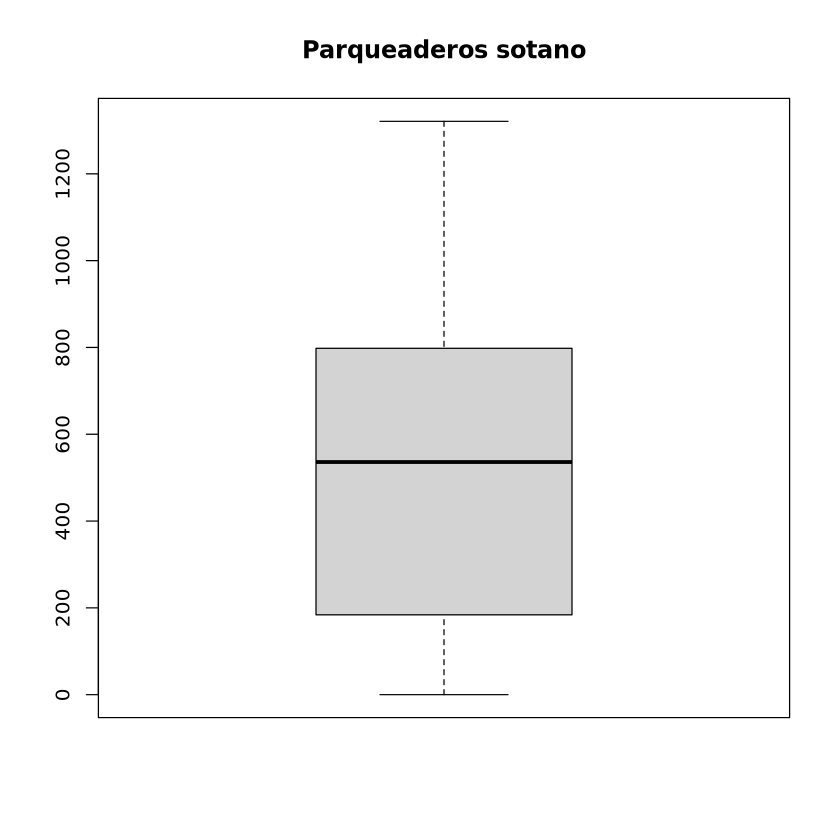

In [122]:
boxplot(train$N_Parkinglot.Ground., main = "Parqueaderos Tierra")
boxplot(train$N_Parkinglot.Basement., main = "Parqueaderos sotano")

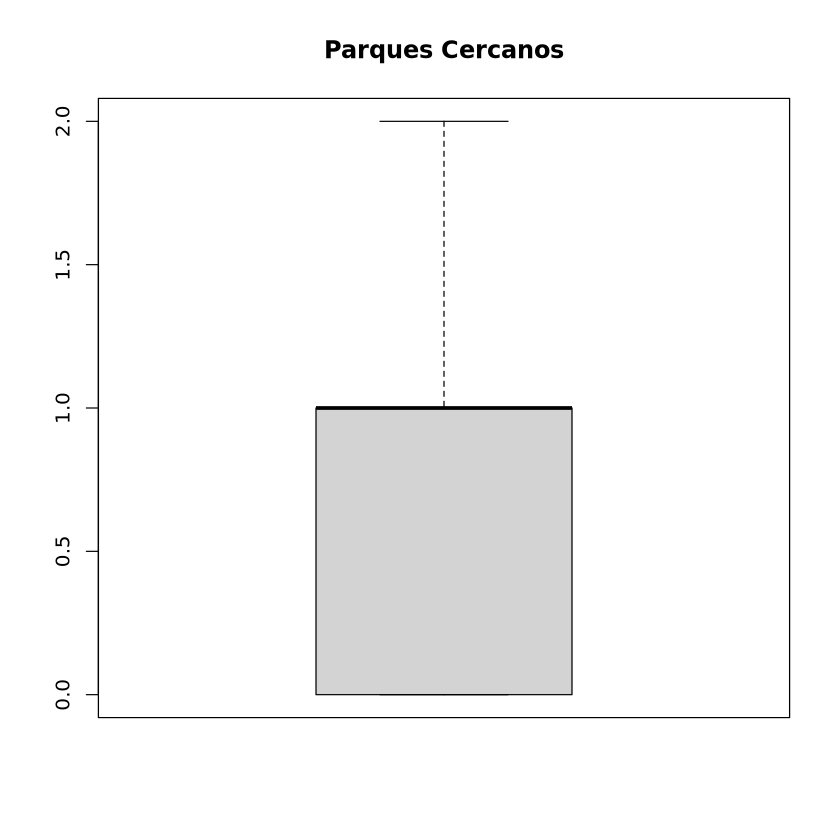

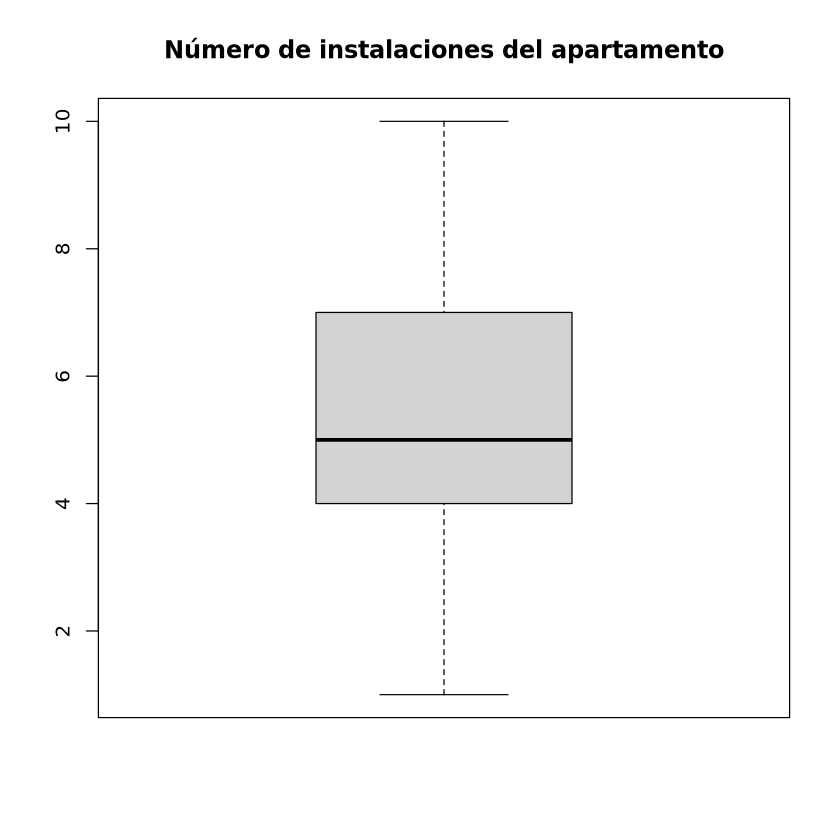

In [124]:
boxplot(train$N_FacilitiesNearBy.Park., main = "Parques Cercanos")
boxplot(train$N_FacilitiesInApt, main = "Número de instalaciones del apartamento")

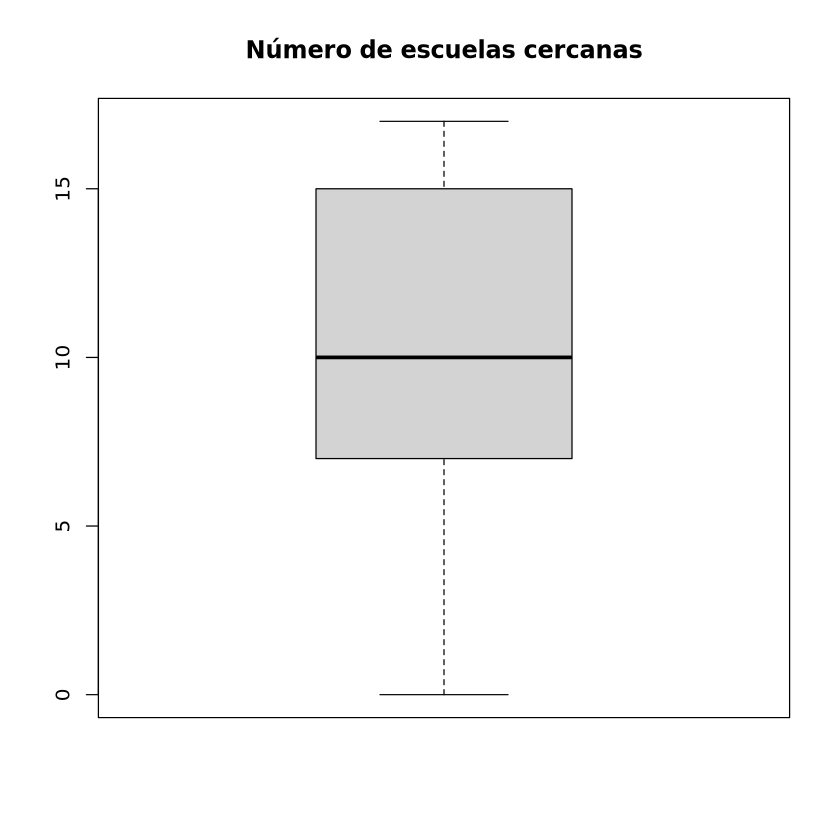

In [125]:
boxplot(train$N_SchoolNearBy.Total., main = "Número de escuelas cercanas")

## Construcción e interpretación de tablas de contingencia

In [136]:
chr_train <- train %>% select(where(is.factor))
colnames(chr_train)

[1] "HallwayType"   "HeatingType"   "AptManageType" "TimeToBusStop" "TimeToSubway"  "SubwayStation"

In [126]:
colnames(train)

[1] "SalePrice"                          "YearBuilt"                          "YrSold"                             "MonthSold"                          "Size.sqf."                         
 [6] "Floor"                              "HallwayType"                        "HeatingType"                        "AptManageType"                      "N_Parkinglot.Ground."              
[11] "N_Parkinglot.Basement."             "TimeToBusStop"                      "TimeToSubway"                       "N_APT"                              "N_manager"                         
[16] "N_elevators"                        "SubwayStation"                      "N_FacilitiesNearBy.PublicOffice."   "N_FacilitiesNearBy.Hospital."       "N_FacilitiesNearBy.Dpartmentstore."
[21] "N_FacilitiesNearBy.Mall."           "N_FacilitiesNearBy.ETC."            "N_FacilitiesNearBy.Park."           "N_SchoolNearBy.Elementary."         "N_SchoolNearBy.Middle."            
[26] "N_SchoolNearBy.High."               "N_SchoolNearBy.University."         "N_FacilitiesInApt"                  "N_FacilitiesNearBy.Total."          "N_SchoolNearBy.Total."

In [161]:
apt <- table(train$HallwayType, train$HeatingType)
apt

          
           central_heating individual_heating
  corridor               0                436
  mixed                  0               1183
  terraced             212               2293

In [162]:
addmargins(apt)

,central_heating,individual_heating,Sum
corridor,0,436,436
mixed,0,1183,1183
terraced,212,2293,2505
Sum,212,3912,4124


In [138]:
apt <- table(train$HeatingType, train$AptManageType)
apt

                    
                     management_in_trust self_management
  central_heating                    212               0
  individual_heating                3664             248

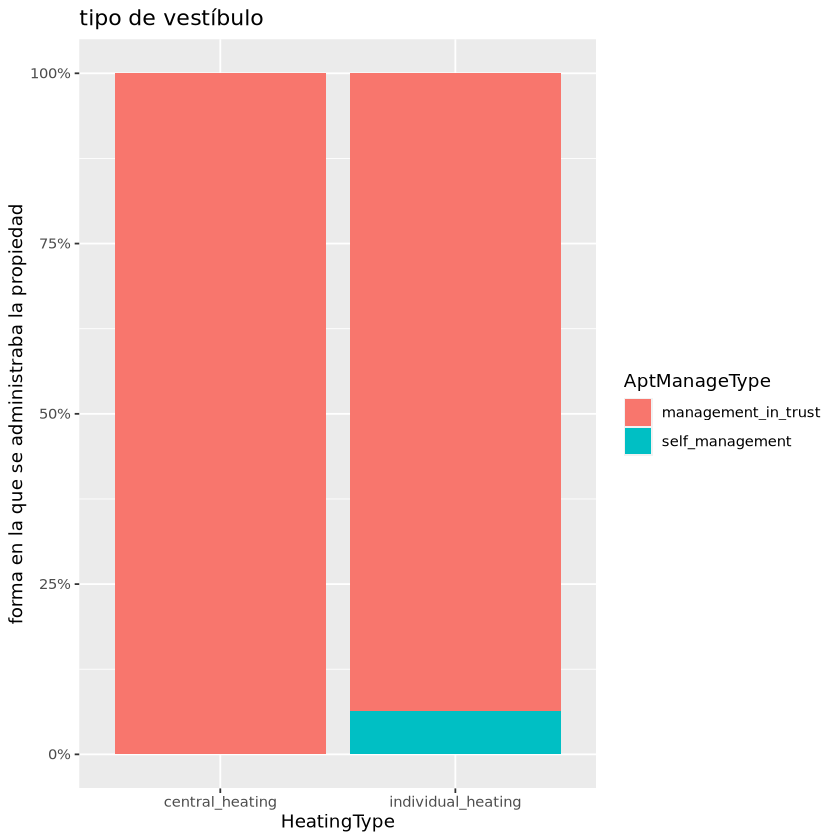

In [163]:
library(ggplot2)

ggplot(train, aes(x = HeatingType, fill = AptManageType)) +
  geom_bar(position = "fill") +
  labs(y = "forma en la que se administraba la propiedad", title = "tipo de vestíbulo") +
  scale_y_continuous(labels = scales::percent)

In [140]:
apt_Mang <- table(train$HallwayType, train$AptManageType)
apt_Mang

          
           management_in_trust self_management
  corridor                 304             132
  mixed                   1067             116
  terraced                2505               0

In [141]:
addmargins(apt_Mang)

,management_in_trust,self_management,Sum
corridor,304,132,436
mixed,1067,116,1183
terraced,2505,0,2505
Sum,3876,248,4124


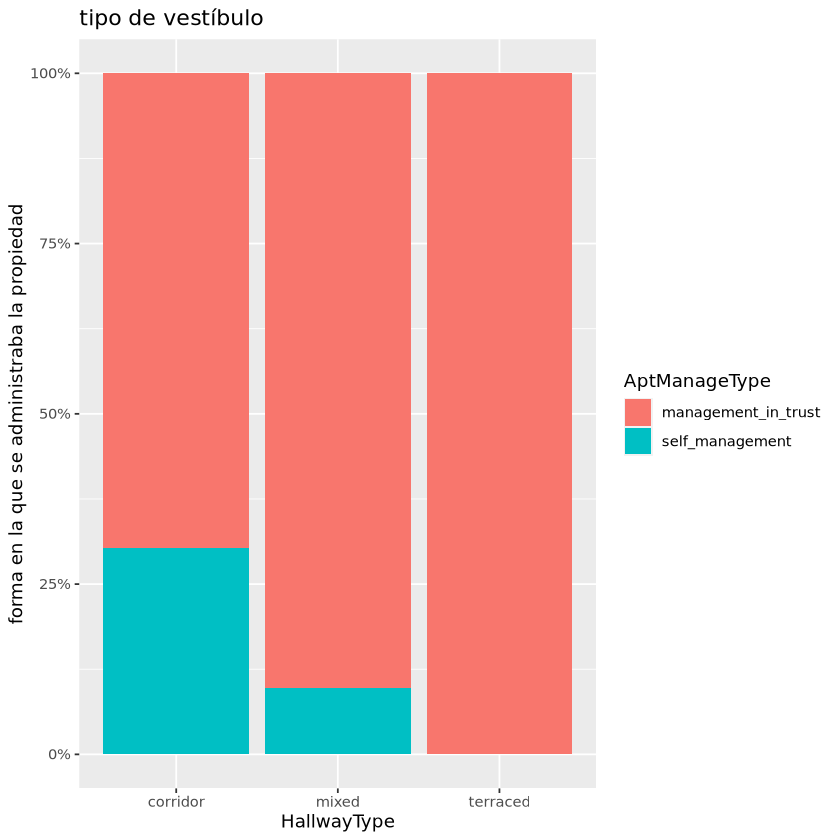

In [143]:
library(ggplot2)

ggplot(train, aes(x = HallwayType, fill = AptManageType)) +
  geom_bar(position = "fill") +
  labs(y = "forma en la que se administraba la propiedad", title = "tipo de vestíbulo") +
  scale_y_continuous(labels = scales::percent)

In [ ]:
subway <- table(train$SubwayStation, train$TimeToSubway)
subway

                       
                        0-5min 10min~15min 15min~20min 5min~10min no_bus_stop_nearby
  Bangoge                    0           0           0        525                  0
  Banwoldang               470           0           0         44                  0
  Chil-sung-market           0           0          75          0                  0
  Daegu                      0           0           0         60                  0
  Kyungbuk_uni_hospital    815         361           0          0                  0
  Myung-duk                256         206         583          0                  0
  no_subway_nearby           0           0           0        108                162
  Sin-nam                  405           0           0         54                  0

In [ ]:
addmargins(subway)

,0-5min,10min~15min,15min~20min,5min~10min,no_bus_stop_nearby,Sum
Bangoge,0,0,0,525,0,525
Banwoldang,470,0,0,44,0,514
Chil-sung-market,0,0,75,0,0,75
Daegu,0,0,0,60,0,60
Kyungbuk_uni_hospital,815,361,0,0,0,1176
Myung-duk,256,206,583,0,0,1045
no_subway_nearby,0,0,0,108,162,270
Sin-nam,405,0,0,54,0,459
Sum,1946,567,658,791,162,4124


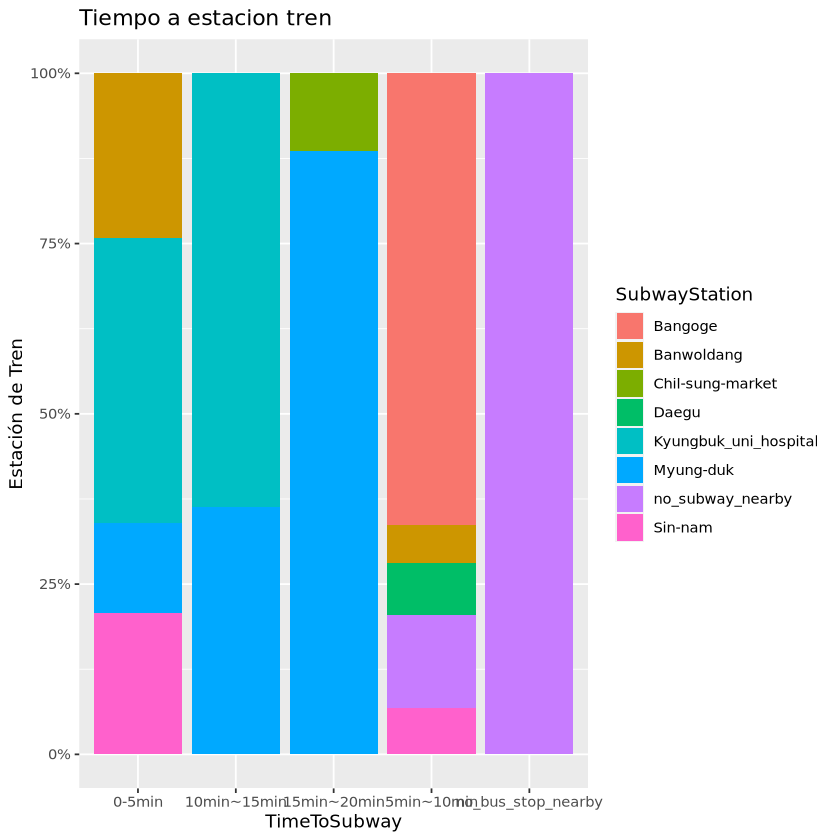

In [131]:
library(ggplot2)

ggplot(train, aes(x = TimeToSubway, fill = SubwayStation)) +
  geom_bar(position = "fill") +
  labs(y = "Estación de Tren", title = "Tiempo a estacion tren") +
  scale_y_continuous(labels = scales::percent)

## Construcción e interpretación de diagramas de dispersión Cálculo e interpretación del coeficiente de correlación

In [148]:
str(train)

tibble [4,124 × 30] (S3: tbl_df/tbl/data.frame)
 $ SalePrice                         : num [1:4124] 141592 51327 48672 221238 78318 ...
 $ YearBuilt                         : num [1:4124] 2006 1985 1985 1993 1992 ...
 $ YrSold                            : num [1:4124] 2007 2007 2007 2007 2007 ...
 $ MonthSold                         : num [1:4124] 8 8 8 8 8 8 8 8 8 8 ...
 $ Size.sqf.                         : num [1:4124] 814 587 587 1761 644 ...
 $ Floor                             : num [1:4124] 3 8 6 3 2 10 13 4 11 18 ...
 $ HallwayType                       : Factor w/ 3 levels "corridor","mixed",..: 3 1 1 2 2 2 2 3 3 3 ...
 $ HeatingType                       : Factor w/ 2 levels "central_heating",..: 2 2 2 2 2 2 2 1 1 2 ...
 $ AptManageType                     : Factor w/ 2 levels "management_in_trust",..: 1 2 2 1 2 1 2 1 1 1 ...
 $ N_Parkinglot.Ground.              : num [1:4124] 111 80 80 523 142 523 142 713 713 0 ...
 $ N_Parkinglot.Basement.            : num [1:4124] 184 76 7

SalePrice, YearBuilt, Size.sqf., Floor, N_Parkinglot.Ground.,  N_Parkinglot.Basement., N_elevators, N_FacilitiesNearBy.Mall., N_FacilitiesNearBy.Park.,  N_FacilitiesInApt, N_SchoolNearBy.Total.

In [150]:
df_cor <- train %>%
  select(SalePrice, YearBuilt, Size.sqf., Floor,
         N_Parkinglot.Ground., N_Parkinglot.Basement.,
         N_elevators, N_FacilitiesNearBy.Mall.,
         N_FacilitiesNearBy.Park., N_FacilitiesInApt,
         N_SchoolNearBy.Total.)

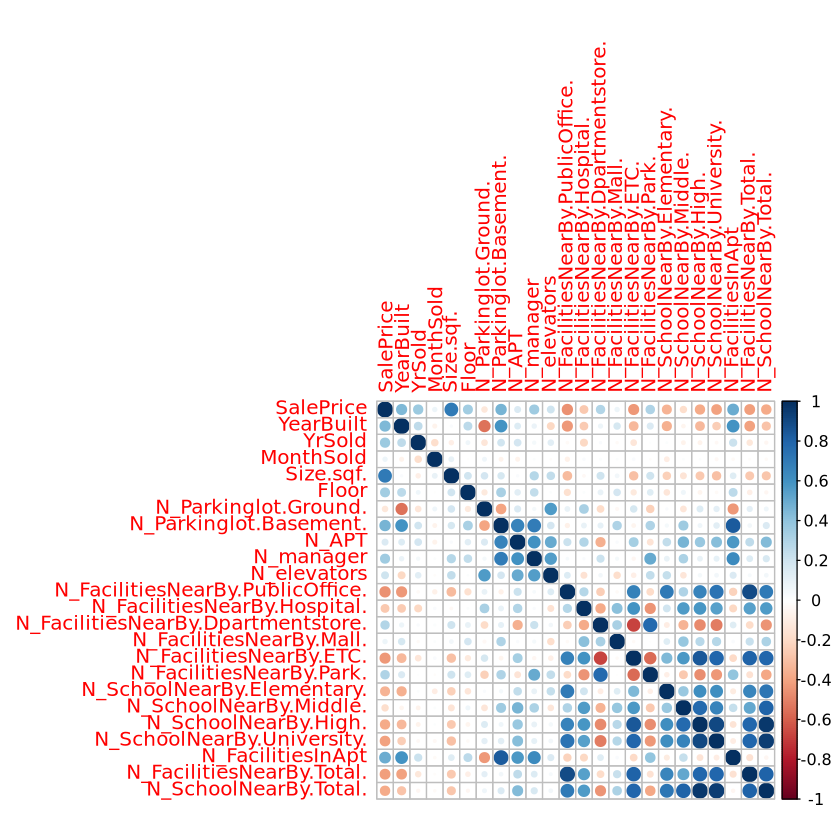

In [144]:
num_train <- train %>% select(where(is.numeric))
cor_data <- cor(num_train)
corrplot(cor_data)

In [152]:
cor(df_cor)

,SalePrice,YearBuilt,Size.sqf.,Floor,N_Parkinglot.Ground.,N_Parkinglot.Basement.,N_elevators,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.Park.,N_FacilitiesInApt,N_SchoolNearBy.Total.
SalePrice,1.0000000,0.44207856,0.70650677,0.34355740,-0.12833523,0.4611270,0.20138552,0.079133702,0.306711478,0.49882673,-0.37926551
YearBuilt,0.4420786,1.00000000,0.02371486,0.26528264,-0.54544184,0.5912795,-0.20275565,0.173967239,0.159109216,0.59996511,-0.28482708
Size.sqf.,0.7065068,0.02371486,1.00000000,0.19492857,0.18052079,0.1743311,0.24014297,0.057127424,0.208969042,0.13697120,-0.27713798
Floor,0.3435574,0.26528264,0.19492857,1.00000000,-0.11627128,0.3281907,0.01143833,0.181115945,0.136674972,0.26596916,-0.04250176
N_Parkinglot.Ground.,-0.1283352,-0.54544184,0.18052079,-0.11627128,1.00000000,-0.3937675,0.56582038,-0.039116863,-0.233167092,-0.43673652,0.06474056
N_Parkinglot.Basement.,0.4611270,0.59127953,0.17433111,0.32819074,-0.39376752,1.0000000,0.18393821,0.302053216,0.304324993,0.83141589,0.15695786
N_elevators,0.2013855,-0.20275565,0.24014297,0.01143833,0.56582038,0.1839382,1.00000000,-0.175779011,0.249067103,0.15674407,0.05616095
N_FacilitiesNearBy.Mall.,0.0791337,0.17396724,0.05712742,0.18111594,-0.03911686,0.3020532,-0.17577901,1.000000000,-0.003124365,0.02915772,0.31368482
N_FacilitiesNearBy.Park.,0.3067115,0.15910922,0.20896904,0.13667497,-0.23316709,0.3043250,0.24906710,-0.003124365,1.000000000,0.39413486,-0.38846016
N_FacilitiesInApt,0.4988267,0.59996511,0.13697120,0.26596916,-0.43673652,0.8314159,0.15674407,0.029157720,0.394134860,1.00000000,-0.04982491


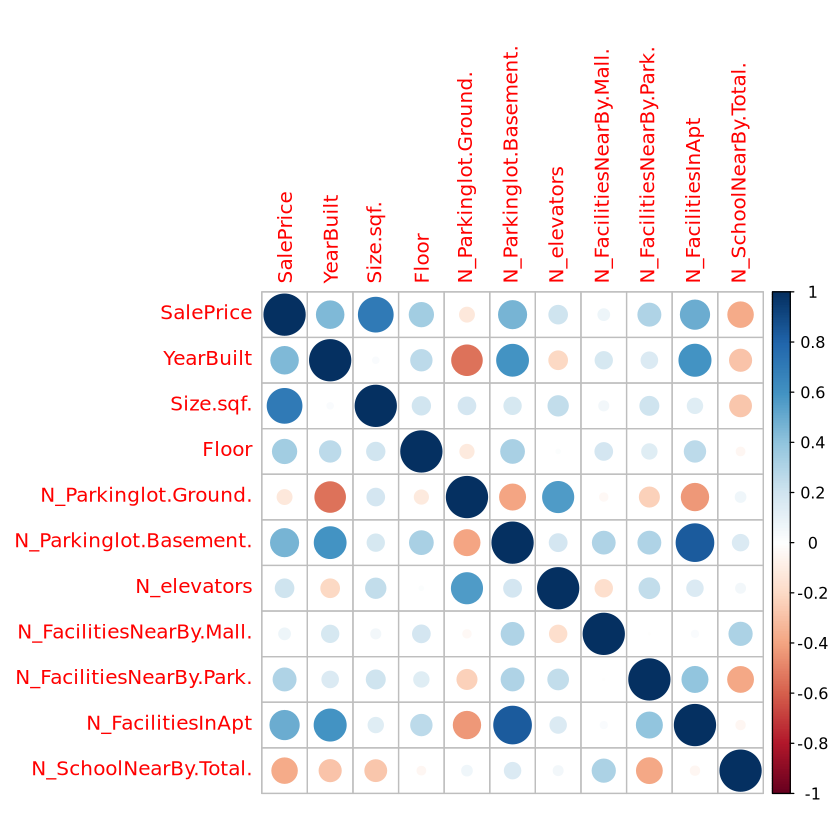

In [151]:
cor_data <- cor(df_cor)
corrplot(cor_data)